##### 高效迭代器 itertools
Python 的標準函式「itertools」是一個針對可迭代物件進行處理的函式，由於是 Python 內建的標準函式，因此處理資料的速度，\
比自己撰寫程式來迭代每個項目還來得迅速，這篇文章將會介紹 itertools 的常用方法。

##### itertools 常用方法 
itertools 包含一系列用來產生不同類型迭代器的方法，這些方法都會回傳一個迭代器，可以透過迴圈的方式取值，\
也可以使用 next() 來取值，itertools 有以下幾種類型與常用的方法 ( 參考 Python 官方文件：time )：

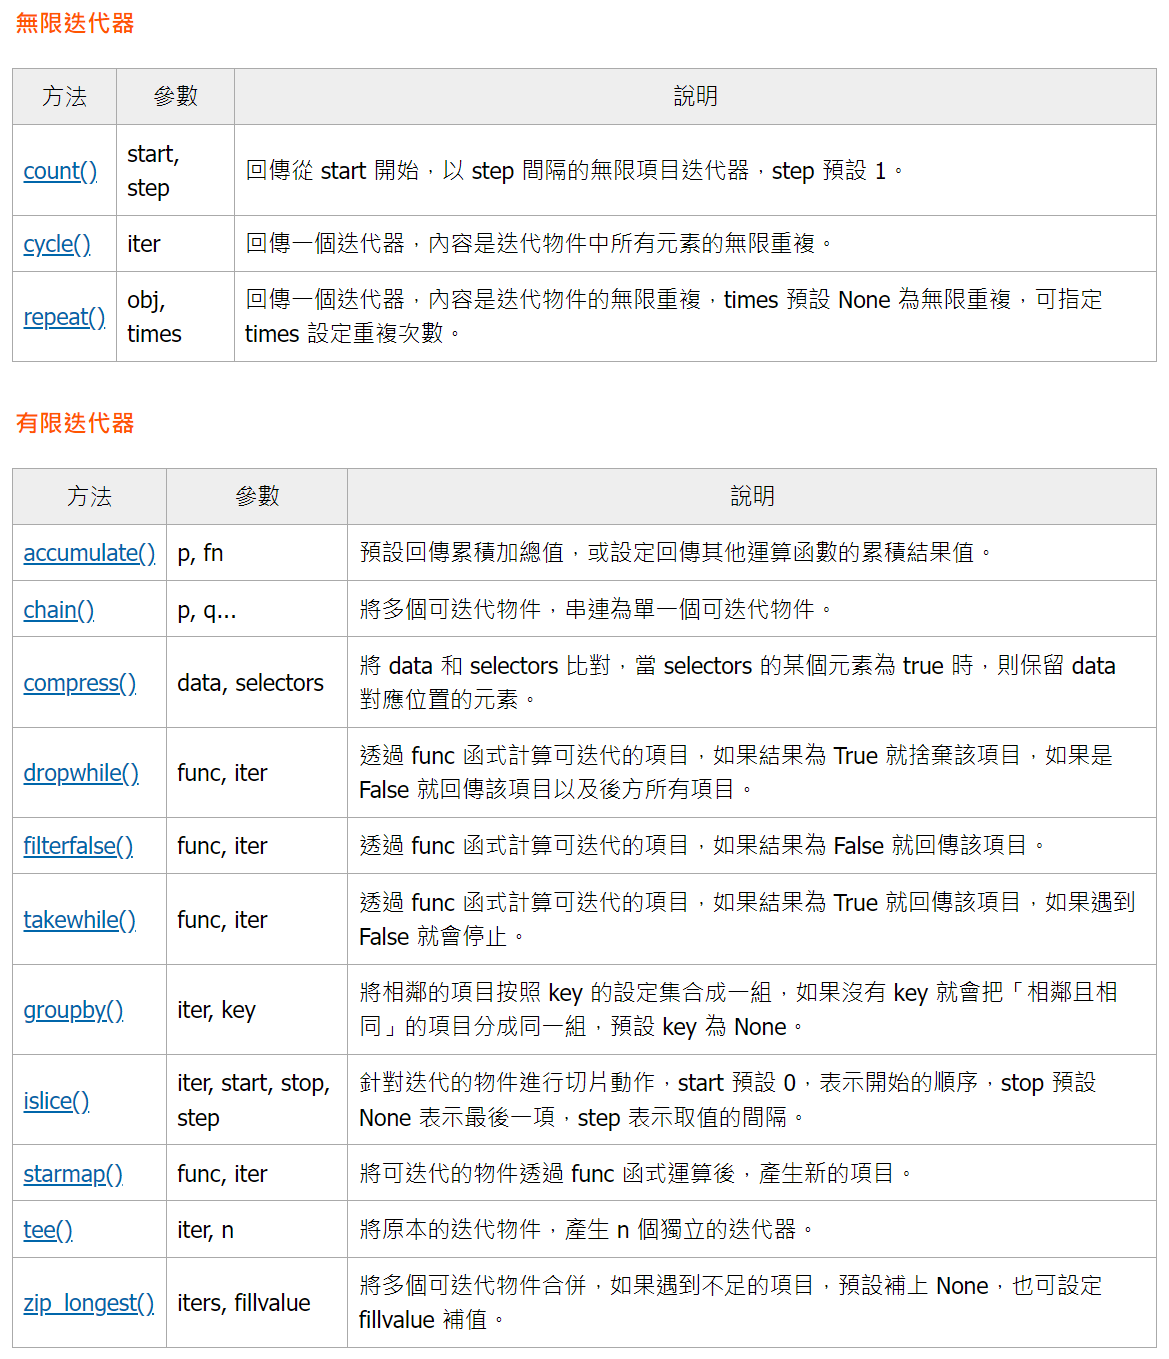

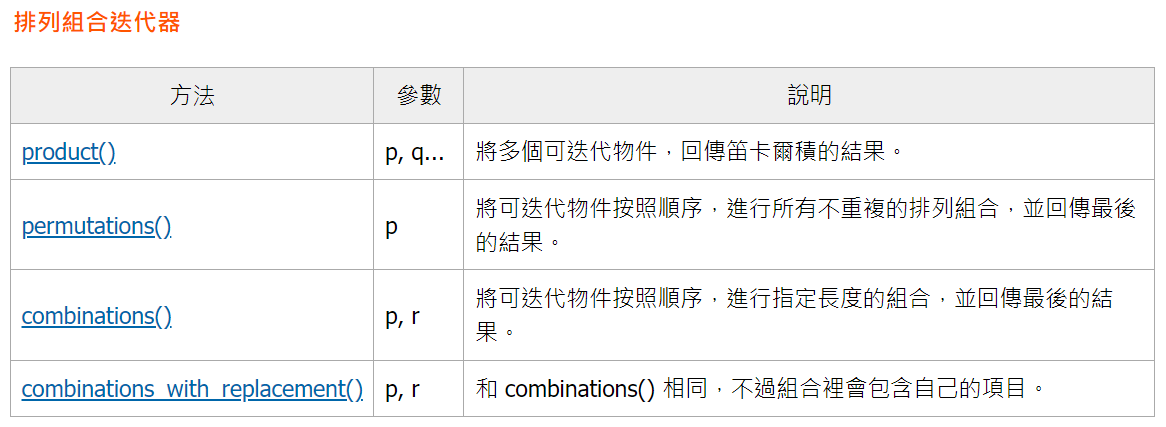

##### import itertools 
要使用 time 必須先 import itertools 模組，或使用 from 的方式，單獨 import 特定的類型。

In [ ]:
import itertools
from itertools import count

##### count(start, step) 
itertools.count(start, step) 執行後會回傳從 start 開始，以 step 間隔的無限項目迭代器，step 預設 1，不填入 step 會自動使用 1，\
由於 count 回傳的迭代器是一個無限循環的產生器，所以如果使用迴圈，則必須要自己撰寫判斷式停止。

In [ ]:
import itertools
a = itertools.count(1)         # 設定 a 從 1 開始，間隔 1 無限循環
b = itertools.count(5, 2)      # 設定 b 從 5 開始，間隔 2 無限循環
for i in a:
    print(i, end=' ')          # 1 2 3 4 5 6 7 印出 a 裡的每個項目
    if i>6: break              # 如果超過 6 就停止
print()
for i in b:
    print(i, end=' ')          # 5 7 9 11 13 15 17 19 21 印出 b 裡的每個項目
    if i>20: break             # 如果超過 20 就停止

因為是產生器，所以能夠使用 next() 讀取，下方程式碼就會依序讀取每個項目。

In [ ]:
import itertools
a = itertools.count(1)
print(next(a))   # 1
print(next(a))   # 2
print(next(a))   # 3
print(next(a))   # 4
print(next(a))   # 5

##### cycle(iterable) 
itertools.cycle(iterable) 執行後會回傳一個迭代器，內容是迭代物件中所有元素的無限重複，下方的程式碼執行後，\
使用 for 迴圈印出 20 個項目，這 20 個項目是使用 ABC 三個字母無限循環所產生。

In [ ]:
import itertools
a = itertools.cycle('ABC')
for i in range(20):
    print(next(a), end=' ')    # A B C A B C A B C A B C A B C A B C A B

##### repeat(object, times) 
itertools.repeat(object, times) 執行後會回傳一個迭代器，內容是迭代物件的無限重複，times 預設 None 為無限重複，\
可指定 times 設定重複次數，下方的程式碼執行後，會印出五次 ABC。

In [ ]:
import itertools
a = itertools.repeat('ABC', 5)
for i in a:
    print(i, end=' ')   # ABC ABC ABC ABC ABC

##### accumulate(p, fn) 
itertools.accumulate(p, fn) 如果不設定 fn，執行後預設回傳累積加總值，如果設定 fn，則會回傳運算函數的累積結果值，下方的例子，\
b 的每個項目會是 a 的每個項目加上前面每個項目的數值，c 的每個項目則是 a 的每個項目乘以前面每個項目的數值。

In [ ]:
import itertools
a = [1,2,3,4,5,6,7,8,9]
b = itertools.accumulate(a)
c = itertools.accumulate(a, lambda x,y: x*y)  # 使用 lambda 匿名函式
for i in b:
    print(i, end=' ')   # 1 3 6 10 15 21 28 36 45
print()
for i in c:
    print(i, end=' ')   # 1 2 6 24 120 720 5040 40320 362880

##### chain(p, q...) 
itertools.chain(p, q...) 可以將多個可迭代物件，串連為單一個可迭代物件，下方的程式碼執行後，\
會將 a、b、c 三個可迭代物件，組合成單一個可迭代的物件。

In [ ]:
import itertools
a = 'abc'
b = 'xyz'
c = [1,2,3]
d = itertools.chain(a, b, c)
for i in d:
    print(i, end=' ')   # a b c x y z 1 2 3

##### compress(data, selectors) 
itertools.compress(data, selectors) 會將 data 和 selectors 比對，當 selectors 的某個元素為 true 時，\
則保留 data 對應位置的元素，下方的程式碼執行後，會以 b 為 True 的項目位置 1、2、5 挑出 a 的項目，\
就會回傳 A、B、E。

In [ ]:
import itertools
a = 'ABCDEFG'
b = [1,1,0,0,1]
c = itertools.compress(a, b)
for i in c:
    print(i, end=' ')   # A B E

##### dropwhile(func, iter) 
itertools.dropwhile(pred, seq) 裡的 func 是函式，iter 是可迭代對象。透過 func 函式計算可迭代的項目，如果結果為 True 就捨棄該項目，\
如果是 False 就回傳該項目以及後方所有項目，下方的程式碼執行後，b 的結果因為在 5 的位置為 Fasle，所以會回傳 5 和後方所有項目，\
而 c 的結果因為在 1 的位置就 False，所以就會回傳 1 和後方所有項目。

In [ ]:
import itertools
a = [1,2,3,4,5,6,7,8,9]
b = itertools.dropwhile(lambda x: x<5, a)
c = itertools.dropwhile(lambda x: x>5, a)
for i in b:
    print(i, end=' ')    # 5 6 7 8 9
print()
for i in c:
    print(i, end=' ')    # 1 2 3 4 5 6 7 8 9

##### filterfalse(func, iter) 
itertools.filterfalse(pred, seq) 裡的 func 是函式，iter 是可迭代對象。透過 func 函式計算可迭代的項目，如果結果為 False 就回傳該項目，\
下方的程式碼執行後，b 會回傳大於等於 5 的數值，c 會回傳小於等於 5 的數值。

In [ ]:
import itertools
a = [1,2,3,4,5,6,7,8,9]
b = itertools.filterfalse(lambda x: x<5, a)
c = itertools.filterfalse(lambda x: x>5, a)
for i in b:
    print(i, end=' ')    # 5 6 7 8 9
print()
for i in c:
    print(i, end=' ')    # 1 2 3 4 5

##### takewhile(func, iter) 
itertools.takewhile(func, iter) 裡的 func 是函式，iter 是可迭代對象。透過 func 函式計算可迭代的項目，如果結果為 True 就回傳該項目，\
如果遇到 False 就會停止，下方的程式碼執行後，b 會回傳小於 5 的數值，c 則不會回傳資料，因為一開始遇到 False 就會停止。

In [ ]:
import itertools
a = [1,2,3,4,5,6,7,8,9]
b = itertools.takewhile(lambda x: x<5, a)
c = itertools.takewhile(lambda x: x>5, a)
for i in b:
    print(i, end=' ')    # 1 2 3 4
print()
for i in c:
    print(i, end=' ')    # 沒有結果，因為一開始就遇到 False

##### groupby(iter, key) 
itertools.groupby(iter, key) 會將相鄰的項目，按照 key 的設定集合成一組，如果沒有 key 就會把「相鄰且相同」的項目分成同一組，\
預設 key 為 None，下方的程式碼執行後，b 會將「相鄰且相同」的項目分成同一組 ( 因為沒有設定key )，而 c 會把轉換成大寫之後\
「相鄰且相同」的項目分成同一組。

In [ ]:
import itertools
a = 'AAaBbbCcC'
b = itertools.groupby(a)
for key, val in b:
    print(key, list(val))

# A ['A', 'A']
# a ['a']
# B ['B']
# b ['b', 'b']
# C ['C']
# c ['c']
# C ['C']

c = itertools.groupby(a, lambda x: x.upper())   # 轉換成大寫後分組
for key, val in c:
    print(key, list(val))

# A ['A', 'A', 'a']
# B ['B', 'b', 'b']
# C ['C', 'c', 'C']

下面的程式會先把一個串列，按照項目的「長度」排序，排序後會按照 key 的設定，把同樣長度的分成同一組。

In [ ]:
import itertools
d = ['dd','ddd','aa','bbbbb','a','ccc','ee']
dd = sorted(d, key=len)          # 按照長度進行排序
e = itertools.groupby(dd, len)   # 按照長度進行分組
for key, val in e:
    print(key, list(val))

# 1 ['a']
# 2 ['dd', 'aa', 'ee']
# 3 ['ddd', 'ccc']
# 5 ['bbbbb']

##### islice(iter, start, stop, step) 
itertools.islice(iter, start, stop, step) 會針對迭代的物件進行切片動作，start 預設 0，表示開始的順序，stop 預設 None 表示最後一項，\
step 表示取值的間隔，下面的項目執行後，會從第二個項目開始，取出間隔 2 的項目。

In [ ]:
import itertools
a = '123456789'
b = itertools.islice(a, 2, len(a), 2)
for i in b:
    print(i, end=' ')   # 3 5 7 9

##### starmap(func, iter) 
itertools.starmap(func, iter) 會將可迭代的物件透過 func 函式運算後，產生新的項目，類似 map() 的用法，\
下方的程式執行後，會把 a 所有的字母變成兩倍。

In [ ]:
import itertools
a = 'abcdefg'
b = itertools.starmap(lambda x: x*2, a)
for i in b:
    print(i, end=' ')

##### tee(iter, n) 
itertools.tee(iter, n) 會將原本的迭代物件，產生 n 個獨立的迭代器，下方的程式執行後，會將 a 變成三個獨立的迭代器。

In [ ]:
import itertools
a = 'abcde'
b = itertools.tee(a, 3)
for i in b:
    print(list(i))

# ['a', 'b', 'c', 'd', 'e']
# ['a', 'b', 'c', 'd', 'e']
# ['a', 'b', 'c', 'd', 'e']

##### zip_longest(*iters, fillvalue) 
itertools.zip_longest(iters, fillvalue) 會將多個可迭代物件合併，如果遇到不足的項目，預設補上 None，也可設定 fillvalue 補值，\
下方的程式碼執行後，會將 a 和 b 組合成可迭代物件，不足的項目以問號 ? 補充。

In [ ]:
import itertools
a = 'abcde'
b = '123'
c = itertools.zip_longest(a, b, fillvalue='?')
for i in c:
    print(i)

##### product(p, q...) 
itertools.product(p, q...) 會將多個可迭代物件，回傳笛卡爾積的結果 ( 參考[笛卡兒積](https://zh.wikipedia.org/wiki/%E7%AC%9B%E5%8D%A1%E5%84%BF%E7%A7%AF) )，下方程式執行後，會回傳 a 和 b 的笛卡爾積。

In [ ]:
import itertools
a = 'abc'
b = '123'
r = itertools.product(a, b)
for i in r:
    print(*i)

# a 1
# a 2
# a 3
# b 1
# b 2
# b 3
# c 1
# c 2
# c 3

##### permutations(p) 
itertools.permutations(p) 會將可迭代物件按照順序，進行所有不重複的排列組合，並回傳最後的結果，\
下方的程式碼執行後，會回傳 abc 三個字母所有的排列組合。

In [ ]:
import itertools
a = 'abc'
r = itertools.permutations(a)
for i in r:
    print(*i)

# a b c
# a c b
# b a c
# b c a
# c a b
# c b a

##### combinations(p, r) 
itertools.combinations(p, r) 會將可迭代物件按照順序，進行指定長度的組合，並回傳最後的結果，和 permutations 不同的是，\
permutations 是所有的排列組合 ( 項目的前後順序不同視為不同項目 )，combinations 則是組合，如果內容元素相同，\
就算排列順序不同，仍視為相同項目。

下方的程式碼執行後，會以 3 的長度印出對應的組合。

In [ ]:
import itertools
a = 'abcde'
r = itertools.combinations(a,3)
for i in r:
    print(*i)

# a b c
# a b d
# a b e
# a c d
# a c e
# a d e
# b c d
# b c e
# b d e
# c d e

##### combinations_with_replacement(p, r) 
itertools.combinations_with_replacement(p, r) 和 combinations 相同，只是組合裡會包含自己的項目，\
下方程式碼執行後，會以 2 的長度印出對應的組合。

In [ ]:
import itertools
a = 'abcde'
r = itertools.combinations_with_replacement(a,2)
for i in r:
    print(*i)
'''
a a
a b
a c
a d
a e
b b
b c
b d
b e
c c
c d
c e
d d
d e
e e
'''